# Name - Hitesh Choudhary
# Prn no. - 20200802146

# Page Rank

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd

In [2]:
graph = nx.gnp_random_graph(25,0.6,directed = True)

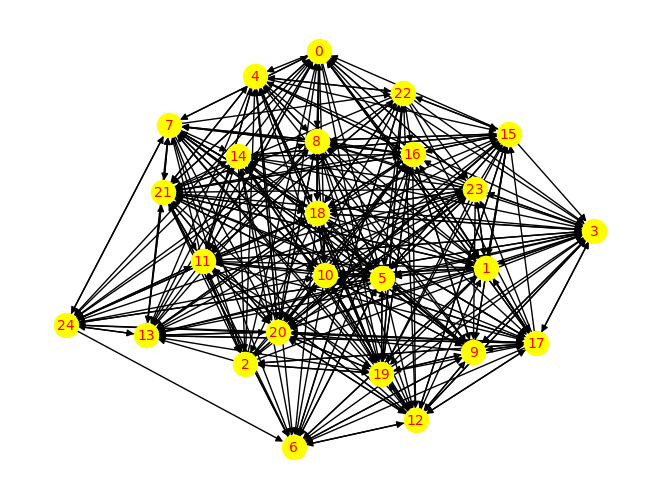

In [3]:
nx.draw(graph,with_labels =True,font_color = 'red',font_size = 10,node_color = 'yellow')
plt.show()

In [4]:
import networkx as nx
import random
import numpy as np

# Add directed edges in graph
def add_edges(g, pr):
    for each in g.nodes():
        for each1 in g.nodes():
            if (each != each1):
                ra = random.random()
                if (ra < pr):
                    g.add_edge(each, each1)
                else:
                    continue
    return g

# Sort the nodes
def nodes_sorted(g, points):
    t = np.array(points)
    t = np.argsort(-t)
    return t

# Distribute points randomly in a graph
def random_Walk(g):
    rwp = [0 for i in range(g.number_of_nodes())]
    nodes = list(g.nodes())
    r = random.choice(nodes)
    rwp[r] += 1
    neigh = list(g.out_edges(r))
    z = 0
    while (z != 10000):
        if (len(neigh) == 0):
            focus = random.choice(nodes)
        else:
            r1 = random.choice(neigh)
            focus = r1[1]
        rwp[focus] += 1
        neigh = list(g.out_edges(focus))
        z += 1
    return rwp

In [5]:
g = nx.DiGraph()
N = 15
g.add_nodes_from(range(N))

g = add_edges(g, 0.4)

points = random_Walk(g)

sorted_by_points = nodes_sorted(g, points)
print("PageRank using Random Walk Method")
print(sorted_by_points)


p_dict = nx.pagerank(g)
p_sort = sorted(p_dict.items(), key=lambda x: x[1], reverse=True)

print("PageRank using inbuilt pagerank method")
for i in p_sort:
    print(i[0], end=", ")


PageRank using Random Walk Method
[14  6 10  5  2 13  7  4  1  8  9 12 11  3  0]
PageRank using inbuilt pagerank method
14, 6, 10, 13, 5, 2, 1, 7, 4, 8, 9, 12, 11, 3, 0, 

# Text Rank

In [6]:
import spacy
import pytextrank
from tabulate import tabulate

In [7]:
document = "Not only did it only confirm that the film would be unfunny and generic, but italso managed to give away the ENTIRE movie; and I'm not exaggerating - every moment, every plot point, every joke is told in the trailer."

In [8]:
en_nlp = spacy.load("en_core_web_sm")
en_nlp.add_pipe("textrank")
doc = en_nlp(document)

In [9]:
tr = doc._.textrank
print(tr.elapsed_time);

7.016658782958984


In [10]:
for combination in doc._.phrases:
    print(combination.text, combination.rank, combination.count)

ENTIRE 0.12192569955977017 1
the trailer 0.09398909652862131 1
the ENTIRE movie 0.08809272122598891 1
every joke 0.06774199896077908 1
the film 0.03642647504614921 1
I 0.0 1
it 0.0 1


In [11]:
tr = doc._.textrank
tr.plot_keyphrases()

alt.Chart(...)